# Przykładowy raster

Data range: 249.17651 - 299.77652
Resolution: (1.0, 1.0)
Coordinates: BoundingBox(left=505264.85663339094, bottom=326039.22440996114, right=507764.85663339094, top=328539.22440996114)


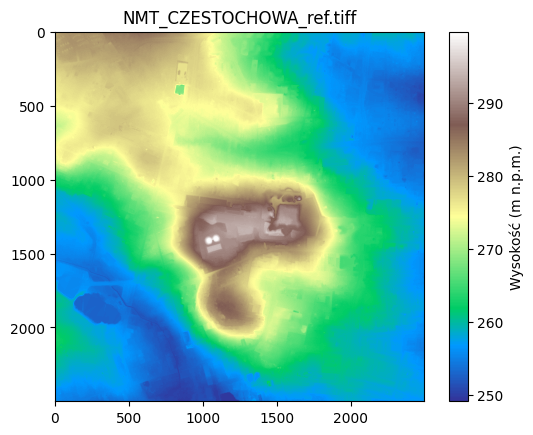

In [187]:
import rasterio
import matplotlib.pyplot as plt

# https://klimat.imgw.pl/pl/meta-dane/

file = "NMT_CZESTOCHOWA_ref.tiff"

with rasterio.open(f'data/geoportal/{file}') as dataset:
    data = dataset.read(1)
    print("Data range:", data.min(), "-", data.max())
    print("Resolution:", dataset.res)
    print("Coordinates:", dataset.bounds)
  
    plt.imshow(data, cmap='terrain')
    plt.colorbar(label="Wysokość (m n.p.m.)")
    plt.title(f"{file}")
    plt.show()


Resolution: (100.0, 100.0)
Coordinates: BoundingBox(left=501514.85663339094, bottom=322289.22440996114, right=511514.85663339094, top=332289.22440996114)


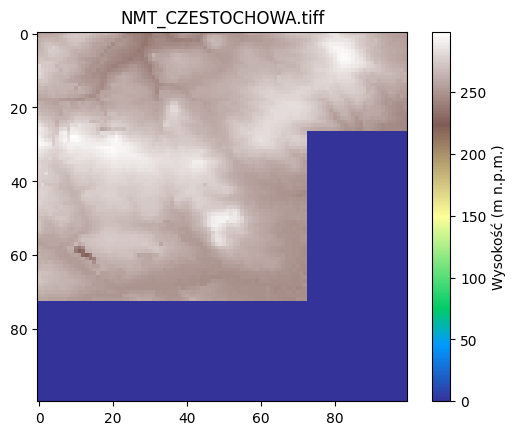

In [188]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# https://klimat.imgw.pl/pl/meta-dane/

file = "NMT_CZESTOCHOWA.tiff"

with rasterio.open(f'data/geoportal/{file}') as dataset:
    data = dataset.read(1)
    print("Resolution:", dataset.res)
    print("Coordinates:", dataset.bounds)
    # lower, upper = np.percentile(data, [0.1, 99.00])
    # Usuń wartości odstające, ustawiając je na NaN
    # data_filtered = np.where((data >= lower) & (data <= upper), data, np.nan)
    # print("Data range:", data_filtered.min(), "-", data.max())
  
    plt.imshow(data, cmap='terrain')
    plt.colorbar(label="Wysokość (m n.p.m.)")
    plt.title(f"{file}")
    plt.show()


# Histogram

In [189]:

"""

import rasterio
import numpy as np
import matplotlib.pyplot as plt
import glob

tiff_files = glob.glob("data/geoportal/*.tiff")

height_values = []

for file in tiff_files:
    with rasterio.open(file) as src:
        data = src.read(1).flatten()
        data = data[~np.isnan(data)]
        height_values.extend(data)

plt.figure(figsize=(10, 6))
plt.hist(height_values, bins=100, edgecolor='black')
plt.title("Histogram for all NMT files")
plt.xlabel("Height (m)")
plt.ylabel("Frequency")
plt.show()
"""

'\n\nimport rasterio\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport glob\n\ntiff_files = glob.glob("data/geoportal/*.tiff")\n\nheight_values = []\n\nfor file in tiff_files:\n    with rasterio.open(file) as src:\n        data = src.read(1).flatten()\n        data = data[~np.isnan(data)]\n        height_values.extend(data)\n\nplt.figure(figsize=(10, 6))\nplt.hist(height_values, bins=100, edgecolor=\'black\')\nplt.title("Histogram for all NMT files")\nplt.xlabel("Height (m)")\nplt.ylabel("Frequency")\nplt.show()\n'

## IMGW

# s_m_d

In [190]:
import pandas as pd

file_path = 'data/imgw/s_m_d_2023.csv'
data_s_m_d = pd.read_csv(file_path)

cols_s_m_d = [
    'Kod_stacji', 'Nazwa_stacji', 'Rok', 'Miesiac', 
    'Absolutna_temperatura_maksymalna', 'Srednia_temperatura_maksymalna', 
    'Absolutna_temperatura_minimalna', 'Srednia_temperatura_minimalna', 
    'Srednia_temperatura_miesieczna', 'Minimalna_temperatura_przy_gruncie', 
    'Miesieczna_suma_opadow', 'Maksymalna_dobowa_suma_opadow', 
    'Miesieczna_suma_uslonecznienia', 'Liczba_dni_z_opadem_deszczu'
]

filtered_data_s_m_d = data_s_m_d[cols_s_m_d]

missing_values = filtered_data_s_m_d.isnull().sum()
missing_values


Kod_stacji                            0
Nazwa_stacji                          0
Rok                                   0
Miesiac                               0
Absolutna_temperatura_maksymalna      0
Srednia_temperatura_maksymalna        0
Absolutna_temperatura_minimalna       0
Srednia_temperatura_minimalna         0
Srednia_temperatura_miesieczna        0
Minimalna_temperatura_przy_gruncie    0
Miesieczna_suma_opadow                0
Maksymalna_dobowa_suma_opadow         0
Miesieczna_suma_uslonecznienia        0
Liczba_dni_z_opadem_deszczu           0
dtype: int64

In [191]:
zero_counts = filtered_data_s_m_d.eq(0).sum()
zero_counts

Kod_stacji                             0
Nazwa_stacji                           0
Rok                                    0
Miesiac                                0
Absolutna_temperatura_maksymalna      12
Srednia_temperatura_maksymalna        13
Absolutna_temperatura_minimalna       17
Srednia_temperatura_minimalna         17
Srednia_temperatura_miesieczna        13
Minimalna_temperatura_przy_gruncie    39
Miesieczna_suma_opadow                 4
Maksymalna_dobowa_suma_opadow          4
Miesieczna_suma_uslonecznienia        91
Liczba_dni_z_opadem_deszczu            8
dtype: int64

In [192]:
filtered_data_s_m_d.describe()


,Kod_stacji,Rok,Miesiac,Absolutna_temperatura_maksymalna,Srednia_temperatura_maksymalna,Absolutna_temperatura_minimalna,Srednia_temperatura_minimalna,Srednia_temperatura_miesieczna,Minimalna_temperatura_przy_gruncie,Miesieczna_suma_opadow,Maksymalna_dobowa_suma_opadow,Miesieczna_suma_uslonecznienia,Liczba_dni_z_opadem_deszczu
count,7.070000e+02,707.0,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,3.517087e+08,2023.0,6.506365,21.271429,13.782461,-1.540453,5.628854,9.528289,-3.682037,60.449505,16.231683,137.808345,11.799151
std,1.656303e+06,0.0,3.452782,8.515770,8.542079,7.183127,5.950658,7.126873,7.739487,37.995051,10.927158,106.979670,4.940077
min,3.491906e+08,2023.0,1.000000,0.000000,-4.500000,-19.000000,-10.300000,-7.500000,-23.400000,0.000000,0.000000,0.000000,0.000000
25%,3.501906e+08,2023.0,4.000000,14.300000,5.700000,-6.750000,0.600000,3.100000,-9.000000,36.450000,9.150000,43.500000,8.500000
50%,3.512205e+08,2023.0,7.000000,22.100000,13.000000,-2.400000,4.200000,8.300000,-3.800000,53.400000,13.100000,117.800000,12.000000
75%,3.531802e+08,2023.0,9.500000,29.200000,23.100000,4.700000,11.850000,17.500000,2.650000,75.700000,19.900000,245.900000,15.000000
max,3.542202e+08,2023.0,12.000000,35.500000,27.600000,13.200000,16.200000,21.100000,10.900000,268.400000,76.700000,379.000000,28.000000


# s_m_t

In [193]:
import pandas as pd

file_path = 'data/imgw/s_m_t_2023.csv'
data_s_m_t = pd.read_csv(file_path)

cols_s_m_t = [
    'Kod_stacji', 'Nazwa_stacji', 'Rok', 'Miesiac',
    'Srednia_miesieczna_predkosc_wiatru', 'Srednie_miesieczne_cisnienie_na_poziomie_stacji', 
    'Srednia_miesieczna_wilgotnosc_wzgledna'
]

filtered_data_s_m_t = data_s_m_t[cols_s_m_t]

missing_values = filtered_data_s_m_t.isnull().sum()
missing_values


Kod_stacji                                         0
Nazwa_stacji                                       0
Rok                                                0
Miesiac                                            0
Srednia_miesieczna_predkosc_wiatru                 0
Srednie_miesieczne_cisnienie_na_poziomie_stacji    0
Srednia_miesieczna_wilgotnosc_wzgledna             0
dtype: int64

In [194]:
zero_counts = filtered_data_s_m_t.eq(0).sum()
zero_counts

Kod_stacji                                          0
Nazwa_stacji                                        0
Rok                                                 0
Miesiac                                             0
Srednia_miesieczna_predkosc_wiatru                 62
Srednie_miesieczne_cisnienie_na_poziomie_stacji    29
Srednia_miesieczna_wilgotnosc_wzgledna             32
dtype: int64

In [195]:
filtered_data_s_m_t.describe()


,Kod_stacji,Rok,Miesiac,Srednia_miesieczna_predkosc_wiatru,Srednie_miesieczne_cisnienie_na_poziomie_stacji,Srednia_miesieczna_wilgotnosc_wzgledna
count,7.070000e+02,707.0,707.000000,707.000000,707.000000,707.000000
mean,3.517087e+08,2023.0,6.506365,3.042857,944.860113,73.959264
std,1.656303e+06,0.0,3.452782,1.789603,199.710573,17.992661
min,3.491906e+08,2023.0,1.000000,0.000000,0.000000,0.000000
25%,3.501906e+08,2023.0,4.000000,2.300000,982.900000,71.300000
50%,3.512205e+08,2023.0,7.000000,2.900000,994.600000,77.500000
75%,3.531802e+08,2023.0,9.500000,3.700000,1003.600000,83.600000
max,3.542202e+08,2023.0,12.000000,17.000000,1022.400000,96.200000


In [196]:
filtered_data_s_m_d.to_csv('data/imgw/filtered_s_m_d_2023.csv', index=False)
filtered_data_s_m_t.to_csv('data/imgw/filtered_s_m_t_2023.csv', index=False)

In [197]:
merged_df = filtered_data_s_m_d.merge(
    filtered_data_s_m_t[['Kod_stacji', 'Miesiac', 'Srednia_miesieczna_predkosc_wiatru', 
                         'Srednie_miesieczne_cisnienie_na_poziomie_stacji', 
                         'Srednia_miesieczna_wilgotnosc_wzgledna']],
    on=['Kod_stacji', 'Miesiac'],
    how='left'
)

merged_df = merged_df.drop(columns=['Rok'])

merged_df.to_csv('data/imgw/filtered_synop_2023.csv', index=False)

merged_df.describe()

,Kod_stacji,Miesiac,Absolutna_temperatura_maksymalna,Srednia_temperatura_maksymalna,Absolutna_temperatura_minimalna,Srednia_temperatura_minimalna,Srednia_temperatura_miesieczna,Minimalna_temperatura_przy_gruncie,Miesieczna_suma_opadow,Maksymalna_dobowa_suma_opadow,Miesieczna_suma_uslonecznienia,Liczba_dni_z_opadem_deszczu,Srednia_miesieczna_predkosc_wiatru,Srednie_miesieczne_cisnienie_na_poziomie_stacji,Srednia_miesieczna_wilgotnosc_wzgledna
count,7.070000e+02,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,3.517087e+08,6.506365,21.271429,13.782461,-1.540453,5.628854,9.528289,-3.682037,60.449505,16.231683,137.808345,11.799151,3.042857,944.860113,73.959264
std,1.656303e+06,3.452782,8.515770,8.542079,7.183127,5.950658,7.126873,7.739487,37.995051,10.927158,106.979670,4.940077,1.789603,199.710573,17.992661
min,3.491906e+08,1.000000,0.000000,-4.500000,-19.000000,-10.300000,-7.500000,-23.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.501906e+08,4.000000,14.300000,5.700000,-6.750000,0.600000,3.100000,-9.000000,36.450000,9.150000,43.500000,8.500000,2.300000,982.900000,71.300000
50%,3.512205e+08,7.000000,22.100000,13.000000,-2.400000,4.200000,8.300000,-3.800000,53.400000,13.100000,117.800000,12.000000,2.900000,994.600000,77.500000
75%,3.531802e+08,9.500000,29.200000,23.100000,4.700000,11.850000,17.500000,2.650000,75.700000,19.900000,245.900000,15.000000,3.700000,1003.600000,83.600000
max,3.542202e+08,12.000000,35.500000,27.600000,13.200000,16.200000,21.100000,10.900000,268.400000,76.700000,379.000000,28.000000,17.000000,1022.400000,96.200000


In [198]:
missing_values = merged_df.isnull().sum()
missing_values


Kod_stacji                                         0
Nazwa_stacji                                       0
Miesiac                                            0
Absolutna_temperatura_maksymalna                   0
Srednia_temperatura_maksymalna                     0
Absolutna_temperatura_minimalna                    0
Srednia_temperatura_minimalna                      0
Srednia_temperatura_miesieczna                     0
Minimalna_temperatura_przy_gruncie                 0
Miesieczna_suma_opadow                             0
Maksymalna_dobowa_suma_opadow                      0
Miesieczna_suma_uslonecznienia                     0
Liczba_dni_z_opadem_deszczu                        0
Srednia_miesieczna_predkosc_wiatru                 0
Srednie_miesieczne_cisnienie_na_poziomie_stacji    0
Srednia_miesieczna_wilgotnosc_wzgledna             0
dtype: int64

In [199]:
zero_counts = merged_df.eq(0).sum()
zero_counts

Kod_stacji                                          0
Nazwa_stacji                                        0
Miesiac                                             0
Absolutna_temperatura_maksymalna                   12
Srednia_temperatura_maksymalna                     13
Absolutna_temperatura_minimalna                    17
Srednia_temperatura_minimalna                      17
Srednia_temperatura_miesieczna                     13
Minimalna_temperatura_przy_gruncie                 39
Miesieczna_suma_opadow                              4
Maksymalna_dobowa_suma_opadow                       4
Miesieczna_suma_uslonecznienia                     91
Liczba_dni_z_opadem_deszczu                         8
Srednia_miesieczna_predkosc_wiatru                 62
Srednie_miesieczne_cisnienie_na_poziomie_stacji    29
Srednia_miesieczna_wilgotnosc_wzgledna             32
dtype: int64

# Corelation matrix

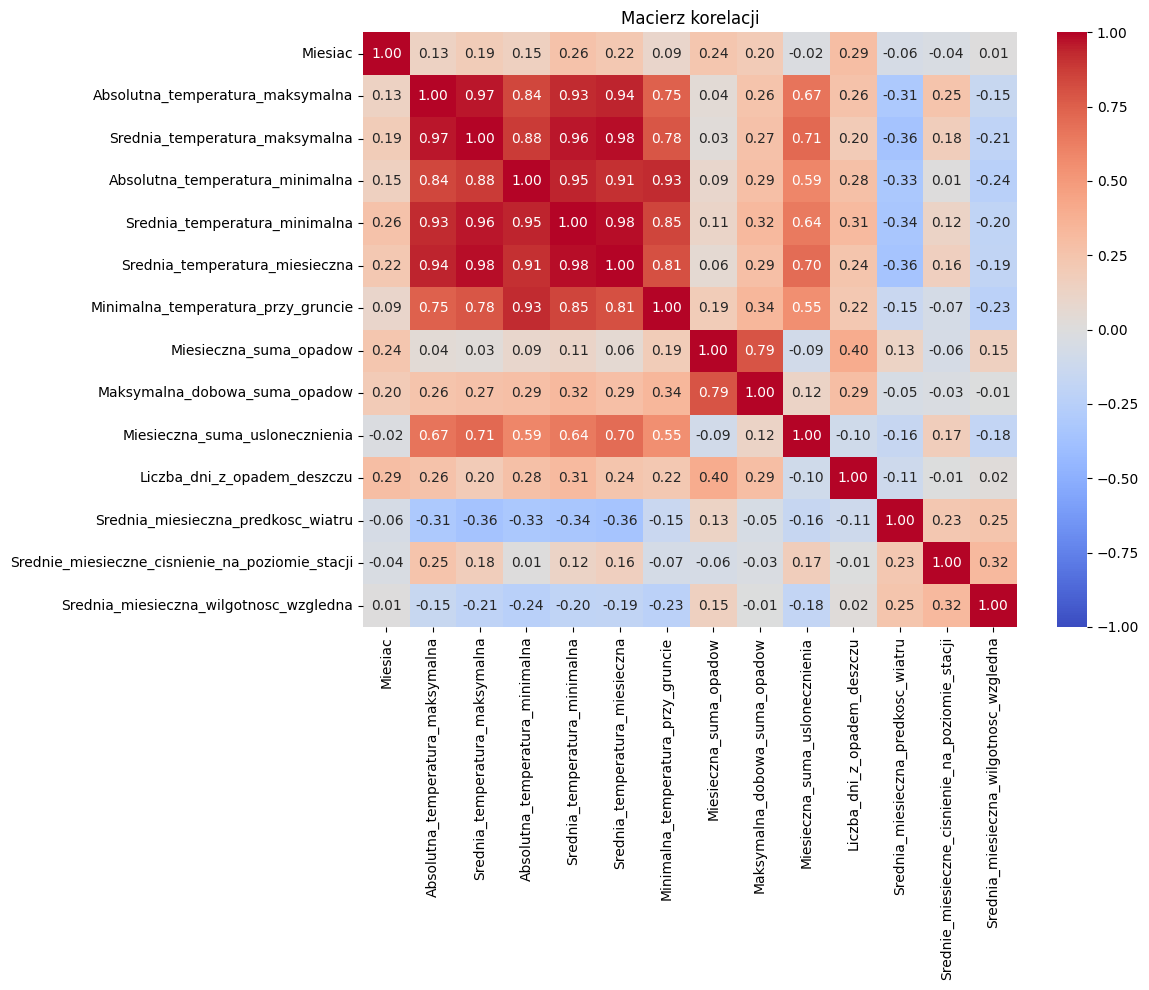

In [203]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = merged_df.copy().drop(columns=['Kod_stacji', 'Nazwa_stacji'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Macierz korelacji")
plt.tight_layout()
plt.savefig(os.path.join('outputFiles/plots', f"correlation_matrix.png"))
plt.show()

# Variables distribution

Month distribution

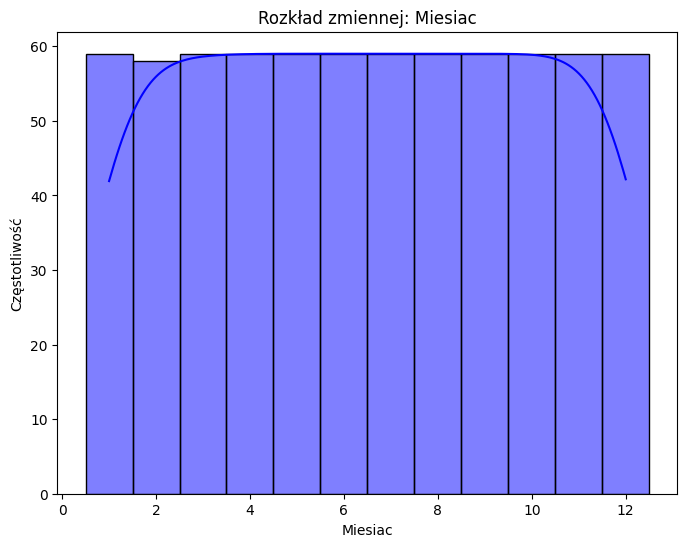

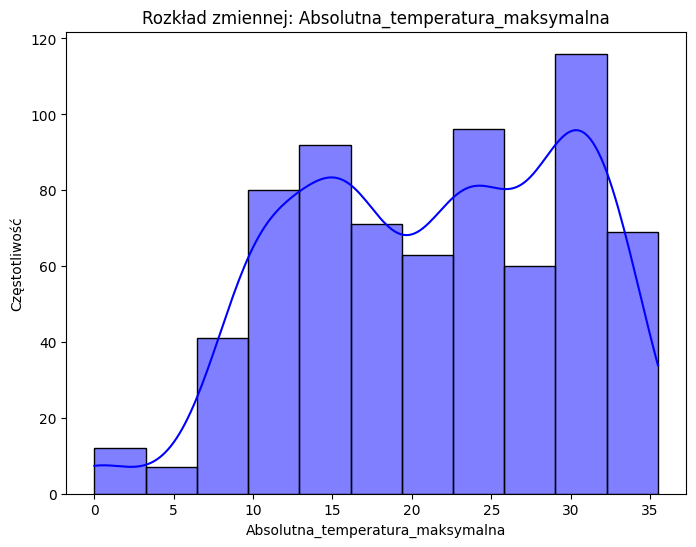

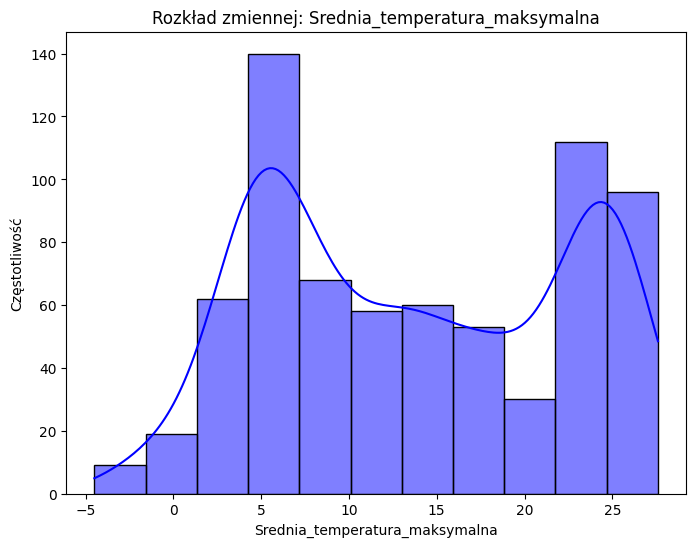

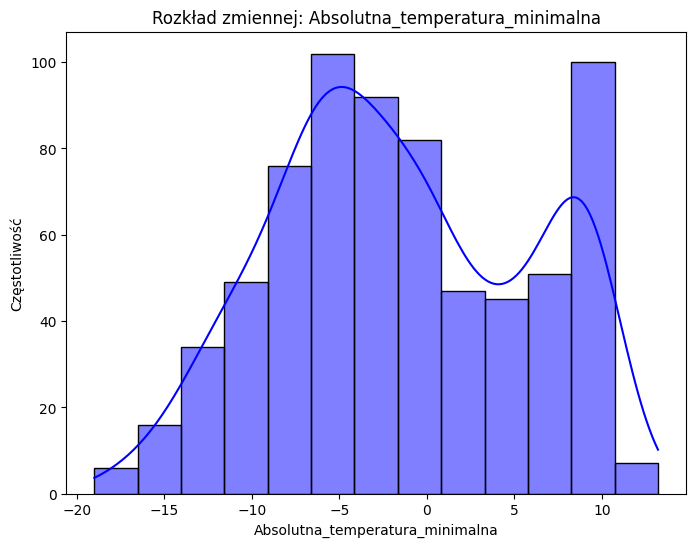

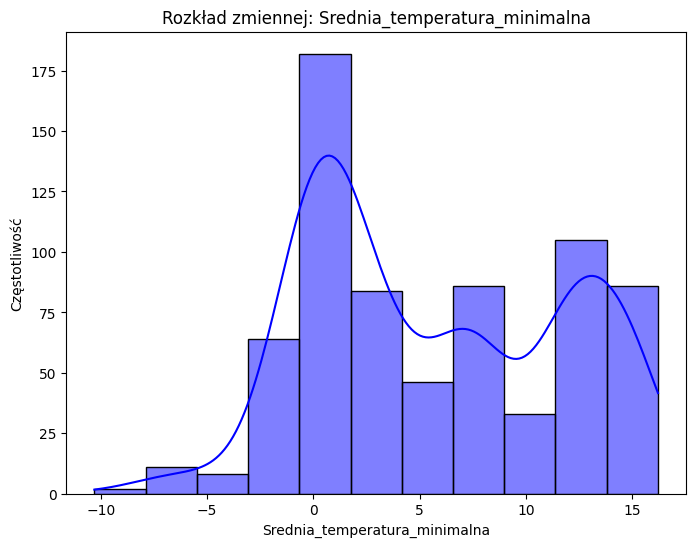

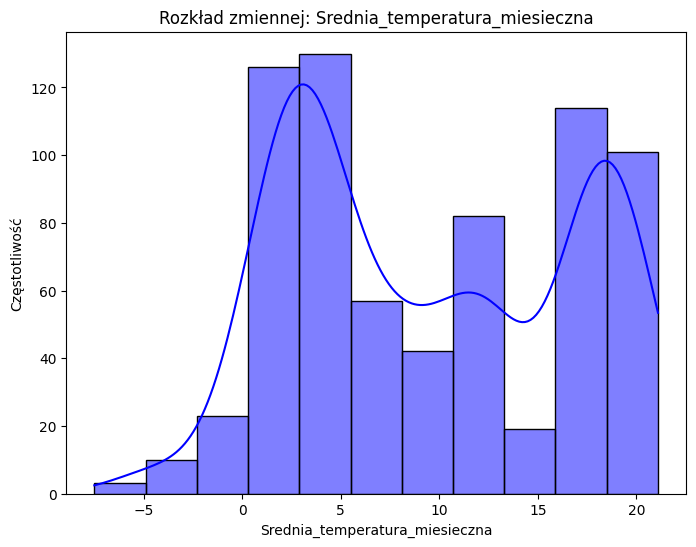

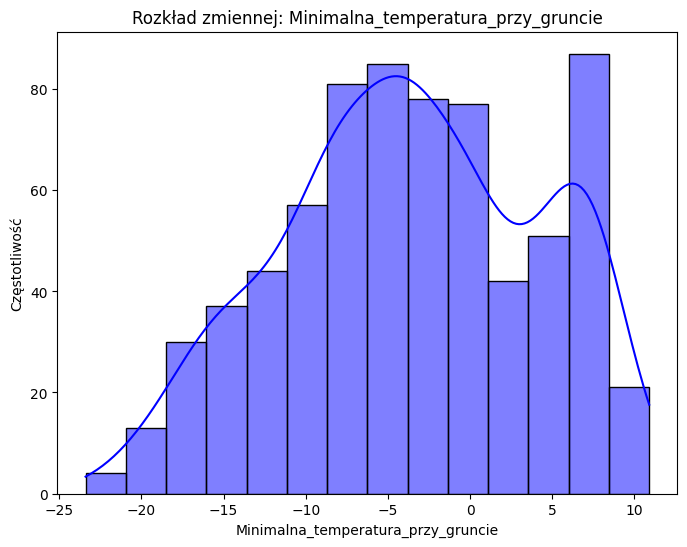

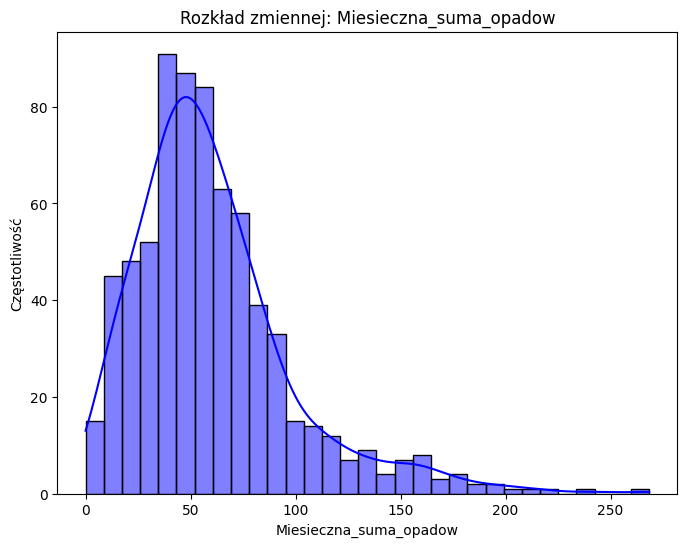

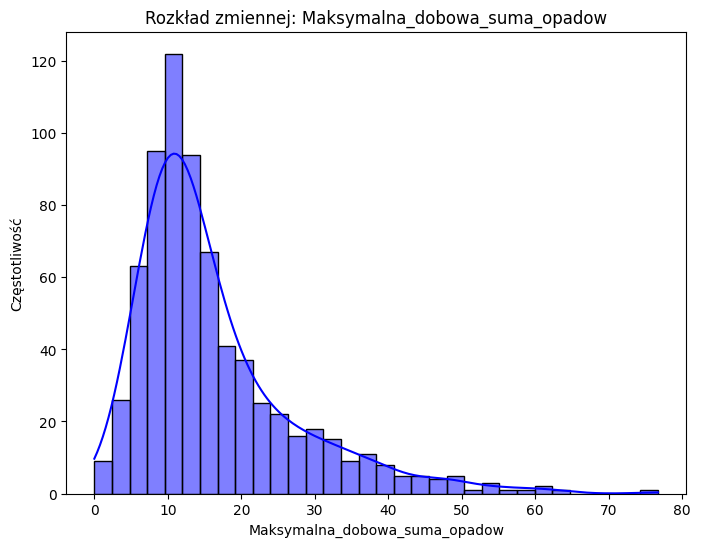

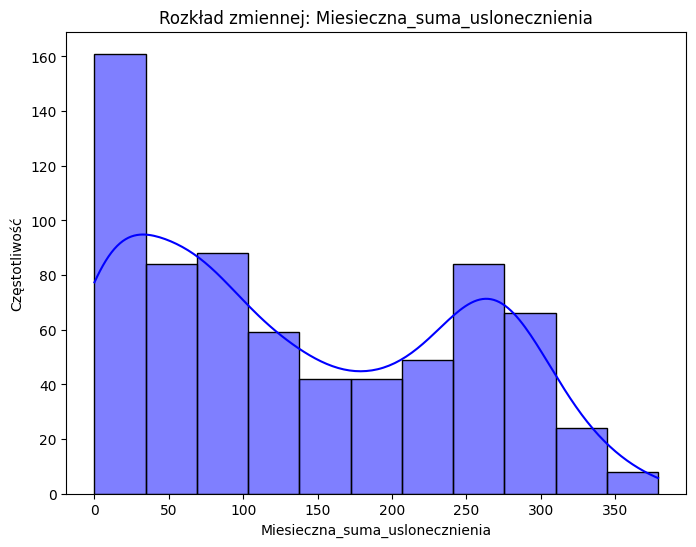

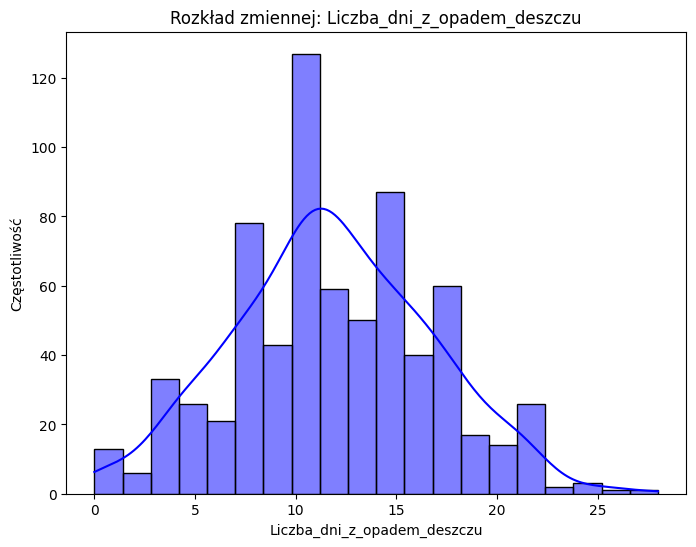

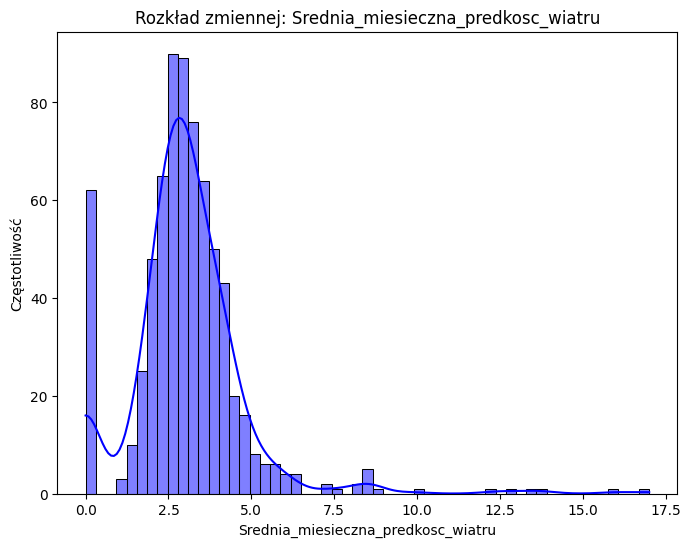

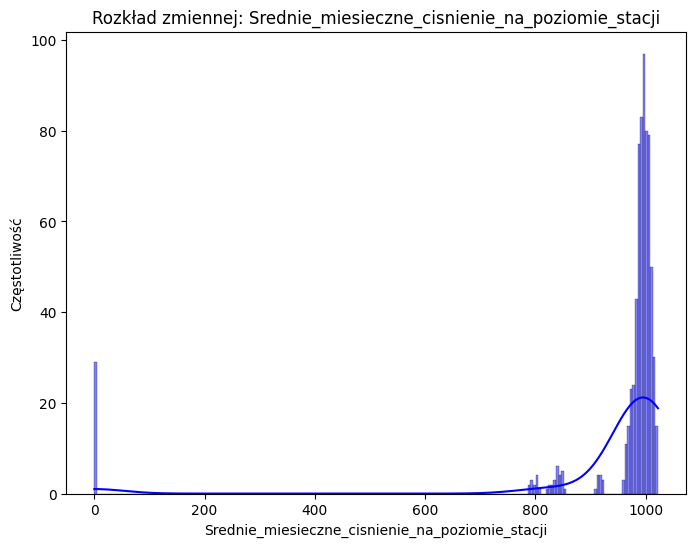

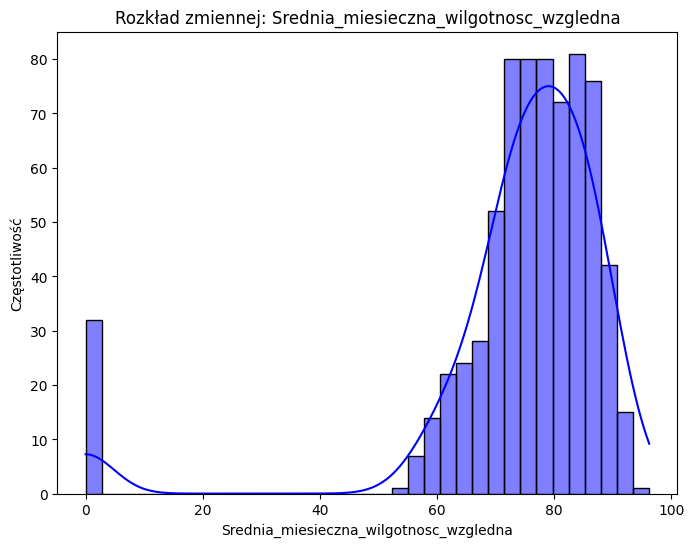

In [204]:
import os

for column in numeric_data.columns:
    if column == 'Miesiac':
        plt.figure(figsize=(8, 6))
        sns.histplot(numeric_data['Miesiac'], bins=12, discrete=True, color='blue', kde=True)
        plt.title("Rozkład zmiennej: Miesiac")
        plt.xlabel("Miesiac")
        plt.ylabel("Częstotliwość")
        
    else:
        plt.figure(figsize=(8, 6))
        sns.histplot(numeric_data[column], kde=True, color='blue')
        plt.title(f"Rozkład zmiennej: {column}")
        plt.xlabel(column)
        plt.ylabel("Częstotliwość")
    plt.savefig(os.path.join('outputFiles/plots', f"{column}_distribution.png"))
    plt.show()
    plt.close()


In [205]:
merged_df.head()

,Kod_stacji,Nazwa_stacji,Miesiac,Absolutna_temperatura_maksymalna,Srednia_temperatura_maksymalna,Absolutna_temperatura_minimalna,Srednia_temperatura_minimalna,Srednia_temperatura_miesieczna,Minimalna_temperatura_przy_gruncie,Miesieczna_suma_opadow,Maksymalna_dobowa_suma_opadow,Miesieczna_suma_uslonecznienia,Liczba_dni_z_opadem_deszczu,Srednia_miesieczna_predkosc_wiatru,Srednie_miesieczne_cisnienie_na_poziomie_stacji,Srednia_miesieczna_wilgotnosc_wzgledna
0,349190600,BIELSKO-BIA�A,1,18.0,5.3,-6.2,1.0,3.1,-9.8,86.8,14.2,61.5,9,4.0,968.6,80.7
1,349190600,BIELSKO-BIA�A,2,11.1,4.6,-14.1,-1.7,1.4,-18.7,49.9,13.3,0.0,9,4.3,975.5,77.7
2,349190600,BIELSKO-BIA�A,3,18.6,10.1,-9.1,1.5,5.6,-13.9,38.0,6.8,0.0,11,4.6,963.8,66.1
3,349190600,BIELSKO-BIA�A,4,20.9,11.7,-6.0,3.1,7.1,-7.3,56.1,10.7,146.2,13,2.8,967.9,72.7
4,349190600,BIELSKO-BIA�A,5,23.9,17.3,0.6,7.3,12.4,-1.3,109.9,33.1,214.0,11,2.9,972.7,71.2
